#Import Data

In [ ]:
import pandas as pd
data = pd.read_csv('DATA NEW.csv', delimiter=';')
data

,tgl,unit,dokter,j_poli
0,22/01/2020,KK/REGULER,D01 - dr. Sheila,UMUM
1,22/01/2020,KK/REGULER,D01 - dr. Sheila,UMUM
2,22/01/2020,KK/REGULER,D01 - dr. Sheila,UMUM
3,22/01/2020,KK/REGULER,D01 - dr. Sheila,UMUM
4,22/01/2020,KK/REGULER,D01 - dr. Sheila,UMUM
...,...,...,...,...
150786,09/12/2024,KK/REGULER,D119 - dr Nicholas,UMUM
150787,09/12/2024,KK/REGULER,D119 - dr Nicholas,UMUM
150788,09/12/2024,KK/REGULER,D119 - dr Nicholas,UMUM
150789,09/12/2024,KK/REGULER,D119 - dr Nicholas,UMUM


#Mengubah Data Menjadi Date Time

In [ ]:
# Pastikan kolom 'tgl' diubah menjadi format datetime
data['tgl'] = pd.to_datetime(data['tgl'], dayfirst=True)

# Tambahkan kolom untuk bulan dan tahun
data['bulan_tahun'] = data['tgl'].dt.to_period('M')

# METODE SARIMA DOKTER UMUM


In [ ]:
poli_umum = data[data['j_poli'].str.upper() == 'UMUM']
monthly_visits_umum = poli_umum.groupby('bulan_tahun').size(). reset_index(name='jumlah_kunjungan_per_bulan')
monthly_visits_umum

,bulan_tahun,jumlah_kunjungan_per_bulan
0,2020-01,303
1,2020-02,3074
2,2020-03,3472
3,2020-04,1868
4,2020-05,1295
5,2020-06,1992
6,2020-07,1961
7,2020-08,1852
8,2020-09,1948
9,2020-10,1871


In [ ]:
data2 = monthly_visits_umum.drop([0,59])
data2

,bulan_tahun,jumlah_kunjungan_per_bulan
1,2020-02,3074
2,2020-03,3472
3,2020-04,1868
4,2020-05,1295
5,2020-06,1992
6,2020-07,1961
7,2020-08,1852
8,2020-09,1948
9,2020-10,1871
10,2020-11,2209


In [ ]:
def is_rainy_season(period_obj):
    month = period_obj.month  # Extract month directly from Period object
    return 1 if month in [10,11, 12, 1, 2, 3, 4] else 0

# Menambahkan kolom is_rainy_season
data2["is_rainy_season"] = data2["bulan_tahun"].apply(is_rainy_season)

# Menampilkan hasil
data2

,bulan_tahun,jumlah_kunjungan_per_bulan,is_rainy_season
1,2020-02,3074,1
2,2020-03,3472,1
3,2020-04,1868,1
4,2020-05,1295,0
5,2020-06,1992,0
6,2020-07,1961,0
7,2020-08,1852,0
8,2020-09,1948,0
9,2020-10,1871,1
10,2020-11,2209,1


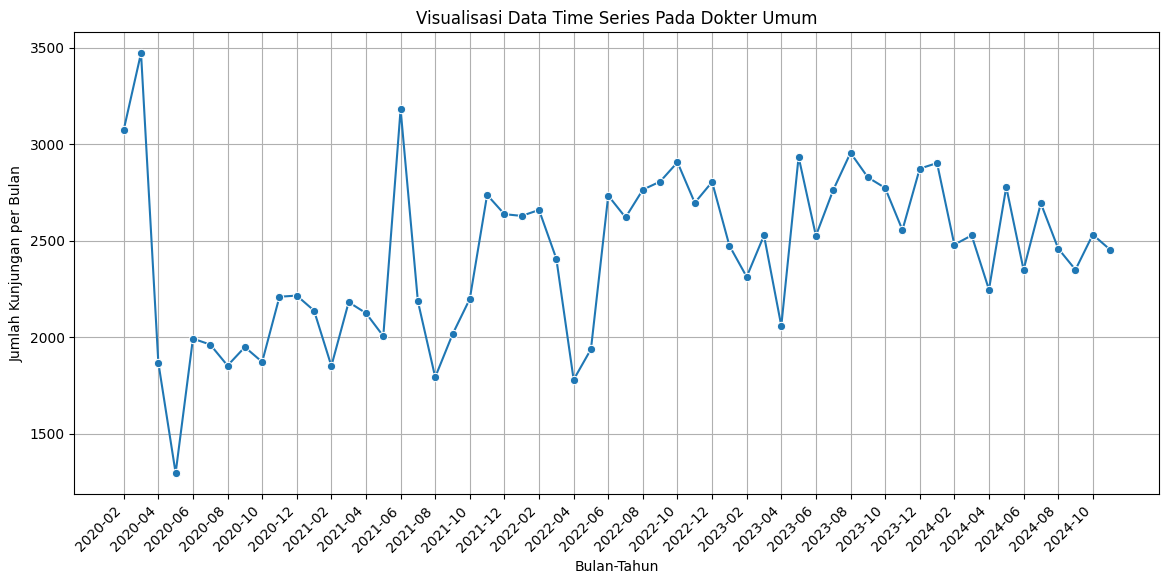

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Konversi 'bulan_tahun' ke string agar bisa digunakan sebagai label sumbu X
data2['bulan_tahun_str'] = data2['bulan_tahun'].astype(str)

# Perbesar ukuran gambar supaya tidak terlalu padat
plt.figure(figsize=(14, 6))

# Plot menggunakan Seaborn
sns.lineplot(x='bulan_tahun_str', y='jumlah_kunjungan_per_bulan', data=data2, marker='o')

plt.xlabel("Bulan-Tahun")
plt.ylabel("Jumlah Kunjungan per Bulan")
plt.title("Visualisasi Data Time Series Pada Dokter Umum")

plt.grid(True)

# **Rotasi sumbu X agar terlihat jelas**
plt.xticks(rotation=45, ha='right')

# **Batasi jumlah label di sumbu X jika terlalu padat**
plt.xticks(ticks=range(0, len(data2['bulan_tahun_str']), 2), labels=data2['bulan_tahun_str'][::2])

# Tampilkan grafik
plt.show()


**Autokorelasi, Musiman dan Stasioneritas**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

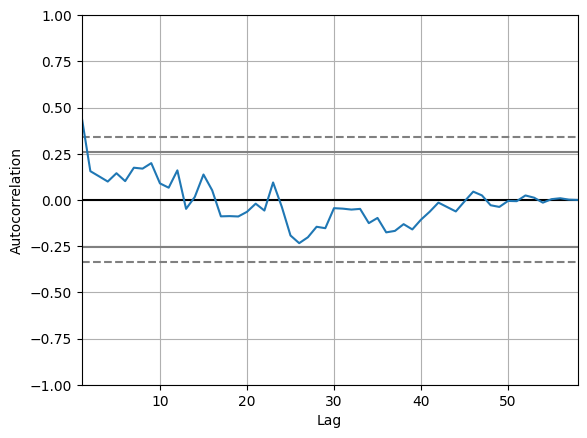

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data2['jumlah_kunjungan_per_bulan'])

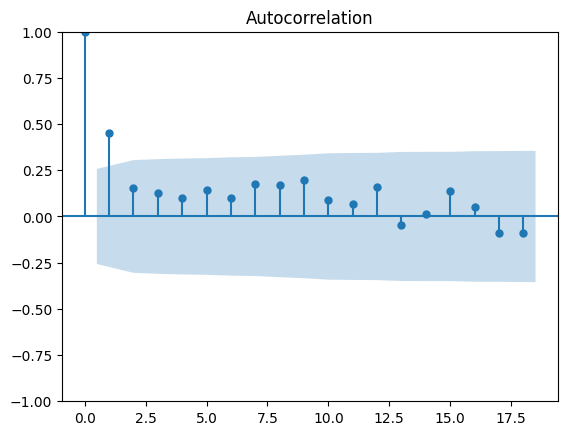

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data2['jumlah_kunjungan_per_bulan'])
plt.show()

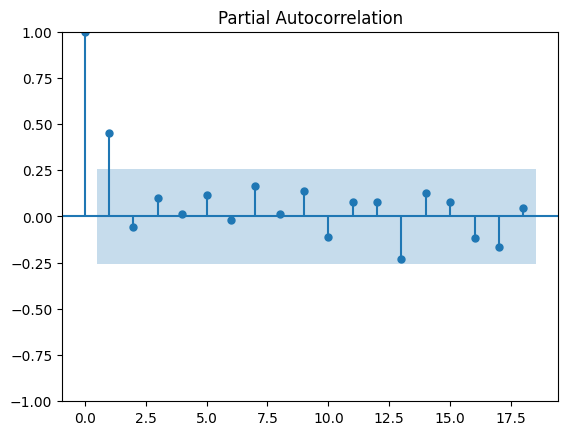

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data2['jumlah_kunjungan_per_bulan'])
plt.show()

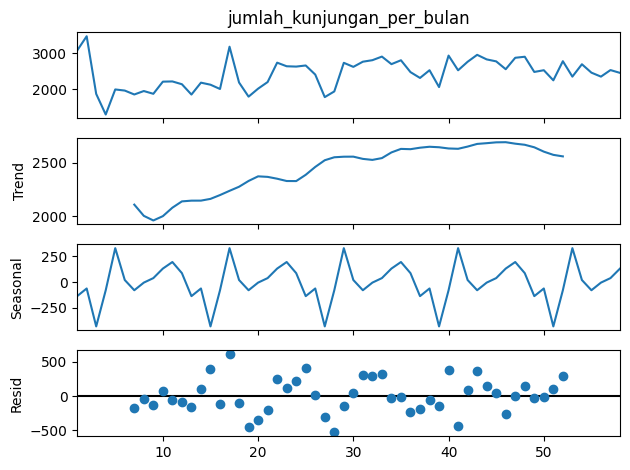

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data2['jumlah_kunjungan_per_bulan'], model='additive', period=12)
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller function
dftest = adfuller(data2['jumlah_kunjungan_per_bulan'], autolag = 'AIC' )
print ( "1. ADF : " ,dftest[ 0 ])
print ( "2. Nilai-P : " , dftest[ 1 ])
print ( "3. Jumlah Lag : " , dftest[ 2 ])
print ( "4. Jumlah Observasi yang Digunakan untuk Regresi ADF dan Perhitungan Nilai Kritis :" , dftest[ 3 ])
print ( "5. Nilai Kritis :" )
for key, val in dftest[ 4 ].items():
    print ( "\t" ,key, ": " , val)

1. ADF :  -4.692145313772431
2. Nilai-P :  8.705884034348881e-05
3. Jumlah Lag :  0
4. Jumlah Observasi yang Digunakan untuk Regresi ADF dan Perhitungan Nilai Kritis : 57
5. Nilai Kritis :
	 1% :  -3.5506699942762414
	 5% :  -2.913766394626147
	 10% :  -2.5946240473991997


Nilai p (6.02) yang diperoleh > dari tingkat signifikansi (0,05) agar hipotesis nol dapat ditolak. Dengan demikian, dapat disimpulkan bahwa deret tersebut tidak stasioner.

**Melakukan Transformasi Data agar data Stasioner**

In [ ]:
data_diff = data2['jumlah_kunjungan_per_bulan'].diff(periods=16)
if data_diff.dropna().empty:
    print("Data is empty after differencing and dropping NaNs. Cannot perform ADF test.")
else:
    dftest = adfuller(data_diff.dropna(), autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

1. ADF :  -4.4647798404809365
2. P-Value :  0.0002275531269013932
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 41
5. Critical Values :
	 1% :  -3.60098336718852
	 5% :  -2.9351348158036012
	 10% :  -2.6059629803688282


Setelah dilakukan trasformasi data Nilai p (0.00) yang diperoleh < dari tingkat signifikansi (0,05) maka hipotesis nol dapat diterima. Dengan demikian, dapat disimpulkan bahwa deret tersebut stasioner.

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.1 MB/s eta 0:00:00


In [ ]:
import pmdarima as pmd

model=pmd.auto_arima(data2[ 'jumlah_kunjungan_per_bulan' ],start_p= 1 ,start_q= 1 ,test= 'adf' ,m= 12 ,seasonal= True ,trace= True )

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=857.233, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=852.745, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=855.270, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=855.680, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=854.745, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=854.745, Time=0.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=853.322, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=852.360, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=854.102, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=854.177, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=852.549, Time=0.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=855.923, Time=2.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=850.470, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,0)[12]             : AIC=852.214, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=852.285, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[12]             : AIC=850.645, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,0,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=850.867, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12]             : AIC=847.111, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=846.237, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12]             : AIC=847.225, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=849.099, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=842.690, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=840.585, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12]             : AIC=inf, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=842.537, Time=0.44 sec
 ARIMA(1,1,1)(0,0,1)[12]             : AIC=inf, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[12]             : AIC=inf, Time=0.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=839.811, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=842.485, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[12]             : AIC=839.749, Time=0.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,1)[12]             : AIC=841.517, Time=0.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=840.841, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12]             : AIC=850.958, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,0,0)[12]             : AIC=840.013, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12]             : AIC=837.121, Time=1.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12]             : AIC=inf, Time=0.93 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[12]             : AIC=839.127, Time=3.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[12]             : AIC=844.295, Time=0.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[12]             : AIC=841.899, Time=0.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,0,0)[12]             : AIC=843.469, Time=1.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,0,0)[12]             : AIC=839.112, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(2,0,0)[12]             : AIC=inf, Time=1.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,0,0)[12]             : AIC=840.269, Time=1.47 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=1.30 sec

Best model:  ARIMA(2,1,2)(2,0,0)[12]          
Total fit time: 27.474 seconds


In [ ]:
# Assuming 'data2' contains your DataFrame and 'is_rainy_season' is your exogenous variable
exog = data2[['is_rainy_season']]  # Select the exogenous variable column

# Split data into training and testing sets
train_size = int(len(data2) * 0.8)  # 80% for training
train, test = data2[:train_size], data2[train_size:]

# Select the exogenous variable data for training and testing
train_exog = exog[:train_size]  # Select exogenous data for training
test_exog = exog[train_size:]  # Select exogenous data for testing

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming 'data2_diff' is the differenced time series data
sarimax = SARIMAX(
    train['jumlah_kunjungan_per_bulan'],  # Use the training data
    exog=train_exog,  # Use the training exogenous data
    order=(2, 1, 2),
    seasonal_order=(2, 0 , 0, 12)
)

# Fit the model
hasil_model = sarimax.fit()

# Predictions (with exogenous factors)
# Use the testing exogenous data (test_exog) for predictions
diprediksi = hasil_model.predict(
    start=train_size,  # Start prediction from the beginning of the test set
    end=len(data2) - 1,
    exog=test_exog  # Provide test exogenous data for predictions
)

# Print predictions
print(diprediksi)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


47    2775.353897
48    2520.926416
49    2596.422219
50    2573.762108
51    2556.505972
52    2686.645825
53    2587.781500
54    2626.297104
55    2672.561971
56    2635.483830
57    2636.940721
58    2596.423389
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


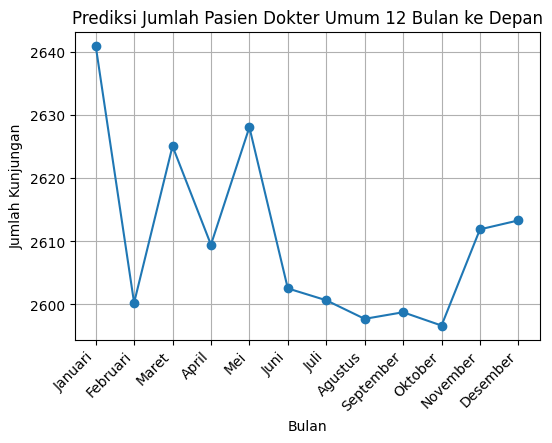

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Asumsikan 'data2' sudah ada dan berisi data jumlah kunjungan per bulan
exog = data2[['is_rainy_season']]  # Pilih variabel eksogen

# Split data into training and testing sets
train_size = int(len(data2) * 0.8)
train, test = data2[:train_size], data2[train_size:]

# Pilih variabel eksogen untuk training dan testing
train_exog = exog[:train_size]
test_exog = exog[train_size:]

# Buat model SARIMAX
sarimax = SARIMAX(
    train['jumlah_kunjungan_per_bulan'],
    exog=train_exog,
    order=(2, 1, 2),
    seasonal_order=(2, 0, 0, 12)
)

# Fit the model
hasil_model = sarimax.fit()

# Prediksi dengan menggunakan variabel eksogen
predictions = hasil_model.predict(
    start=train_size,
    end=len(data2) - 1,
    exog=test_exog
)

# **Prediksi 12 Bulan ke Depan**
exog_future2 = pd.DataFrame({'is_rainy_season': exog['is_rainy_season'][-12:].values.tolist() * 2})
start = len(data2)
end = len(data2) + 11
prediksi_12_bulan = hasil_model.predict(start=start, end=end, exog=exog_future2)

# **Menambahkan Label Bulan Januari - Desember**
bulan_nama = ["Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"]

# **Membuat DataFrame untuk Prediksi 12 Bulan**
df_future_pred = pd.DataFrame({
    'Bulan': bulan_nama,
    'Prediksi': prediksi_12_bulan.values
})

# **Visualisasi dengan Matplotlib**
plt.figure(figsize=(6, 4))  # Ukuran lebih kecil
plt.plot(df_future_pred['Bulan'], df_future_pred['Prediksi'], marker='o', linestyle='-')

# **Menambahkan Grid**
plt.grid(True)

# **Rotasi Sumbu X**
plt.xticks(rotation=45, ha='right')

# **Judul dan Label**
plt.title('Prediksi Jumlah Pasien Dokter Umum 12 Bulan ke Depan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kunjungan')

# **Tampilkan Grafik**
plt.show()


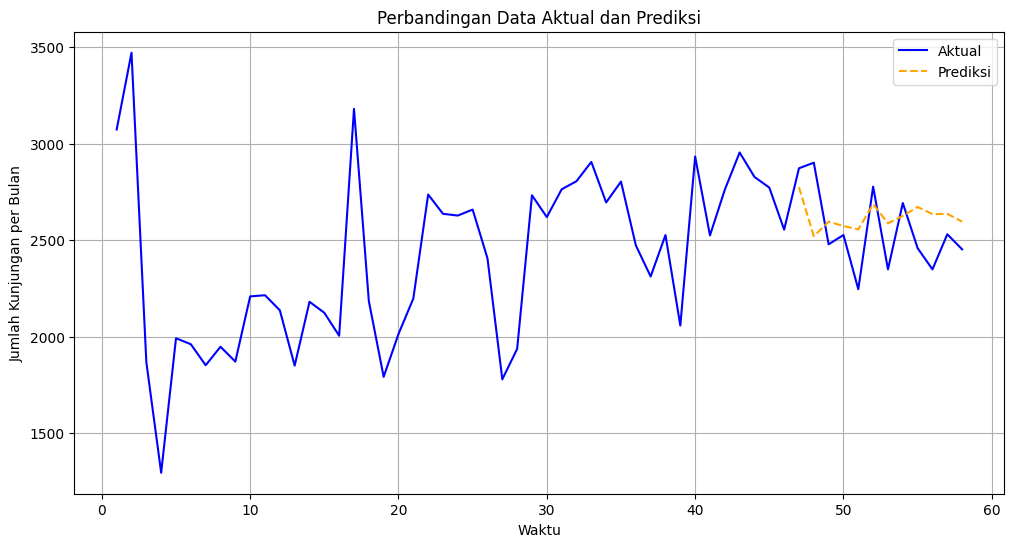

In [ ]:
import matplotlib.pyplot as plt

# Buat DataFrame untuk menyatukan data aktual dan prediksi
data2['Predicted'] = [None] * train_size + list(diprediksi)  # Gabungkan prediksi hanya untuk data uji

# Plot data aktual dan prediksi
plt.figure(figsize=(12, 6))
plt.plot(data2['jumlah_kunjungan_per_bulan'], label='Aktual', color='blue')
plt.plot(data2['Predicted'], label='Prediksi', color='orange', linestyle='--')
plt.title('Perbandingan Data Aktual dan Prediksi')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kunjungan per Bulan')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Assuming your original 'exog' DataFrame contains the 'is_rainy_season' data
# exog_future needs 24 rows (one for each month you're predicting)
# and 1 column (for the 'is_rainy_season' variable)

exog_future2 = pd.DataFrame({'is_rainy_season': exog['is_rainy_season'][-12:].values.tolist()*2})# Repeat the pattern twice

# Prediction
start = len(data2)  # Start predicting from the next period
end = len(data2) + 11# Predict for 12 periods (start is inclusive, so we need to go to len(data2) + 11)

prediksi_12_bulan = hasil_model.predict(start=start, end=end, exog=exog_future2)

# Print the results
print("Prediksi 12 bulan ke depan:")
print(prediksi_12_bulan)

Prediksi 12 bulan ke depan:
59    2640.975720
60    2600.253659
61    2625.054142
62    2609.444711
63    2628.047126
64    2602.529968
65    2600.654299
66    2597.711295
67    2598.759638
68    2596.652106
69    2611.878728
70    2613.296976
Name: predicted_mean, dtype: float64


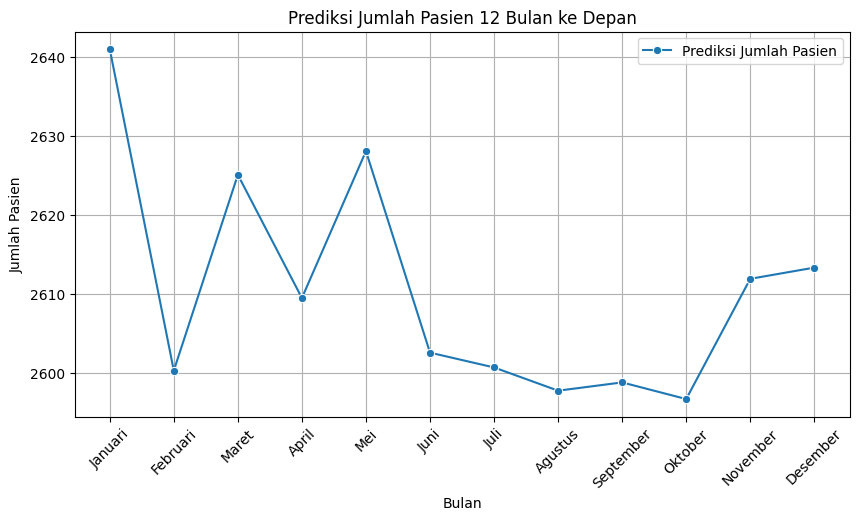

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar nama bulan dari Januari sampai Desember
bulan_nama = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

# Pastikan hasil prediksi memiliki 12 nilai
if len(prediksi_12_bulan) == 12:
    prediksi_12_bulan.index = bulan_nama  # Ubah indeks menjadi nama bulan

# Buat DataFrame untuk visualisasi
prediksi_df = pd.DataFrame({
    'Bulan': prediksi_12_bulan.index,
    'Prediksi': prediksi_12_bulan.values
})

# Plot Grafik Prediksi
plt.figure(figsize=(10, 5))
sns.lineplot(x=prediksi_df['Bulan'], y=prediksi_df['Prediksi'], marker='o', label="Prediksi Jumlah Pasien")

plt.xlabel("Bulan")
plt.ylabel("Jumlah Pasien")
plt.title("Prediksi Jumlah Pasien 12 Bulan ke Depan")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotasi label agar lebih rapi

# Tampilkan Grafik
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Data aktual dari set testing
actual = test['jumlah_kunjungan_per_bulan']

# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(actual, diprediksi)

# Hitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Menghitung MAPE
mape = np.mean(np.abs((actual - diprediksi) / actual)) * 100


# Cetak hasil evaluasi
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MSE: 41368.94
RMSE: 203.39
MAPE: 6.98%


In [ ]:
import pickle

In [ ]:
import pandas as pd

# Data
data4 = {
    "bulan_tahun": ["2024-01", "2024-02", "2024-03", "2024-04", "2024-05", "2024-06",
                    "2024-07", "2024-08", "2024-09", "2024-10", "2024-11", "2024-12"],
    "jumlah_kunjungan_per_bulan": [2902, 2479, 2527, 2246, 2778, 2349, 2693, 2459, 2349, 2531, 2453, 716]
}

# Membuat DataFrame
df = pd.DataFrame(data4)

# Menyimpan ke file CSV
df.to_csv('data_dokter_umum2024.csv', index=False)

print("CSV file telah dibuat!")


CSV file telah dibuat!


In [ ]:
file_name = 'model.sav'
pickle.dump(hasil_model, open(file_name, 'wb'))
file_name = 'exog.sav'
pickle.dump(exog_future2, open(file_name, 'wb'))


#METODE SARIMA DOKTER GIGI

In [ ]:
df_gigi = data[data['j_poli'] == 'GIGI']
df_gigi

,tgl,unit,dokter,j_poli,bulan_tahun
9,2020-01-22,KK/REGULER,D02 - drg. Adri,GIGI,2020-01
873,2020-02-06,KK/REGULER,D02 - drg. Adri,GIGI,2020-02
891,2020-02-06,KK/REGULER,D02 - drg. Adri,GIGI,2020-02
892,2020-02-06,KK/REGULER,D02 - drg. Adri,GIGI,2020-02
893,2020-02-06,KK/REGULER,D02 - drg. Adri,GIGI,2020-02
...,...,...,...,...,...
150703,2024-12-09,KK/REGULER,D03 - drg. Hilda,GIGI,2024-12
150705,2024-12-09,KK/REGULER,D03 - drg. Hilda,GIGI,2024-12
150715,2024-12-09,KK/REGULER,D03 - drg. Hilda,GIGI,2024-12
150719,2024-12-09,KK/REGULER,D03 - drg. Hilda,GIGI,2024-12


In [ ]:
data_minggu_bulan = df_gigi.groupby('bulan_tahun').size().reset_index(name='jumlah_kunjungan_perbulan')
data_minggu_bulan

,bulan_tahun,jumlah_kunjungan_perbulan
0,2020-01,1
1,2020-02,96
2,2020-03,148
3,2020-04,112
4,2020-05,94
5,2020-06,179
6,2020-07,146
7,2020-08,137
8,2020-09,158
9,2020-10,157


In [ ]:
data1 = data_minggu_bulan.drop([0,59])
data1

,bulan_tahun,jumlah_kunjungan_perbulan
1,2020-02,96
2,2020-03,148
3,2020-04,112
4,2020-05,94
5,2020-06,179
6,2020-07,146
7,2020-08,137
8,2020-09,158
9,2020-10,157
10,2020-11,162


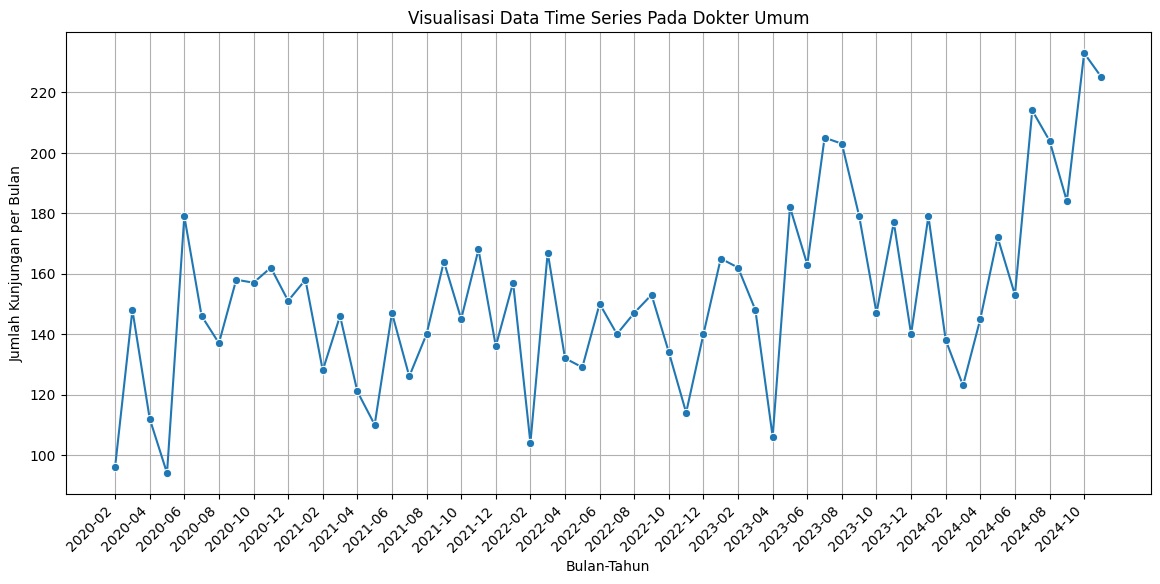

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Konversi 'bulan_tahun' ke string agar bisa digunakan sebagai label sumbu X
data1['bulan_tahun_str'] = data1['bulan_tahun'].astype(str)

# Perbesar ukuran gambar supaya tidak terlalu padat
plt.figure(figsize=(14, 6))

# Plot menggunakan Seaborn
sns.lineplot(x='bulan_tahun_str', y='jumlah_kunjungan_perbulan', data=data1, marker='o')

plt.xlabel("Bulan-Tahun")
plt.ylabel("Jumlah Kunjungan per Bulan")
plt.title("Visualisasi Data Time Series Pada Dokter Umum")

plt.grid(True)

# **Rotasi sumbu X agar terlihat jelas**
plt.xticks(rotation=45, ha='right')

# **Batasi jumlah label di sumbu X jika terlalu padat**
plt.xticks(ticks=range(0, len(data1['bulan_tahun_str']), 2), labels=data1['bulan_tahun_str'][::2])

# Tampilkan grafik
plt.show()


**Autokorelasi, Musiman dan Stasioneritas**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

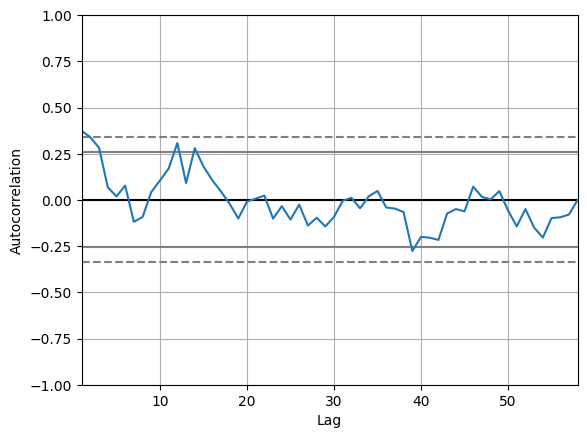

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data1['jumlah_kunjungan_perbulan'])

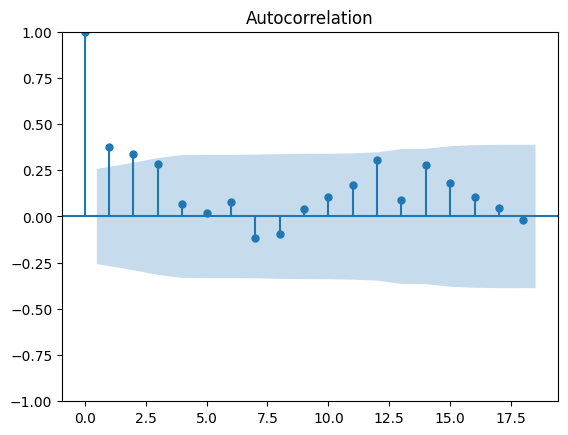

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data1['jumlah_kunjungan_perbulan'])#
plt.show()

grafik menurun secara exsponensial

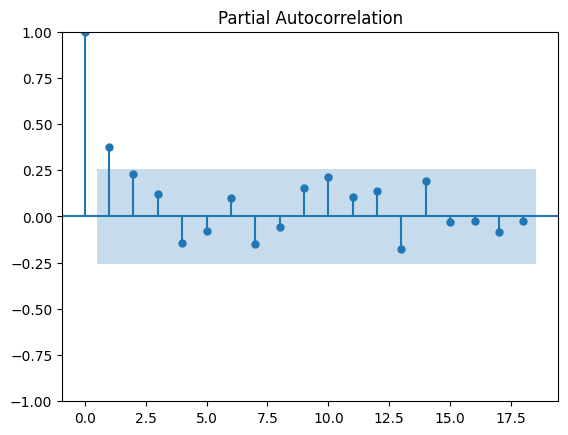

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data1[ 'jumlah_kunjungan_perbulan' ])
plt.show()
plt.show()

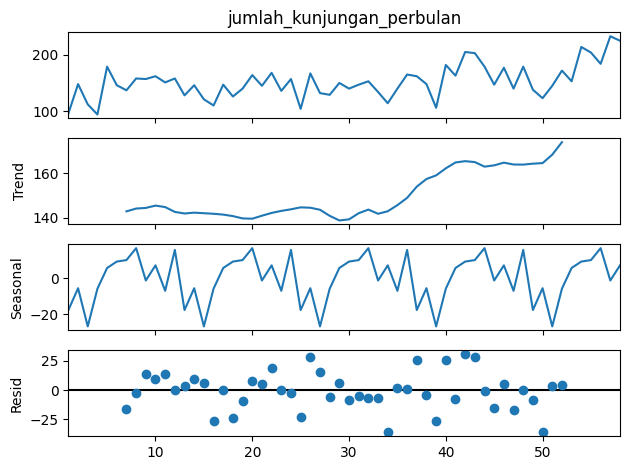

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data1['jumlah_kunjungan_perbulan'], model='additive', period=12)
decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data1['jumlah_kunjungan_perbulan'], autolag = 'AIC' )
print ( "1. ADF : " ,dftest[ 0 ])
print ( "2. Nilai-P : " , dftest[ 1 ])
print ( "3. Jumlah Lag : " , dftest[ 2 ])
print ( "4. Jumlah Observasi yang Digunakan untuk Regresi ADF dan Perhitungan Nilai Kritis :" , dftest[ 3 ])
print ( "5. Nilai Kritis :" )
for key, val in dftest[ 4 ].items():
    print ( "\t" ,key, ": " , val)

1. ADF :  0.6245759644818072
2. Nilai-P :  0.9882059773688501
3. Jumlah Lag :  11
4. Jumlah Observasi yang Digunakan untuk Regresi ADF dan Perhitungan Nilai Kritis : 46
5. Nilai Kritis :
	 1% :  -3.5812576580093696
	 5% :  -2.9267849124681518
	 10% :  -2.6015409829867675


Nilai p (1,8) yang diperoleh > dari tingkat signifikansi (0,05) agar hipotesis nol dapat ditolak. Dengan demikian, dapat disimpulkan bahwa deret tersebut tidak stasioner.

**Melakukan Transformasi Data agar data Stasioner**

In [ ]:
# Reduce the periods value in diff to a number smaller than the DataFrame size
data1_diff = data1['jumlah_kunjungan_perbulan'].diff(periods= 1)  # Example: periods=1 for first-order differencing

# Check if the data1_diff still has valid data points after dropna()
if data1_diff.dropna().empty:
    print("Error: data1_diff is empty after dropna(). Adjust 'periods' in diff().")
else:
    dftest = adfuller(data1_diff.dropna(), autolag='AIC')
    print("1. ADF : " ,dftest[ 0 ])
    print("2. Nilai-P :", dftest[1])
    print("3. Jumlah Lag :", dftest[2])
    print("4. Jumlah Observasi yang Digunakan untuk Regresi ADF dan Perhitungan Nilai Kritis :", dftest[3])
    print("5. Nilai Kritis :")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

1. ADF :  -4.215087716558698
2. Nilai-P : 0.0006212053683776904
3. Jumlah Lag : 10
4. Jumlah Observasi yang Digunakan untuk Regresi ADF dan Perhitungan Nilai Kritis : 46
5. Nilai Kritis :
	 1% : -3.5812576580093696
	 5% : -2.9267849124681518
	 10% : -2.6015409829867675


Setelah dilakukan trasformasi data Nilai p (0.00) yang diperoleh < dari tingkat signifikansi (0,05) maka hipotesis nol dapat diterima. Dengan demikian, dapat disimpulkan bahwa deret tersebut stasioner.

In [ ]:
import pmdarima as pmd

model=pmd.auto_arima(data1[ 'jumlah_kunjungan_perbulan' ],start_p= 1 ,start_q= 1 ,test= 'adf' ,m= 12 ,seasonal= True ,trace= True )

Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=540.376, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=558.595, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=541.497, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=537.066, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=556.891, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=538.735, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=538.517, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=538.387, Time=0.30 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=536.553, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=538.505, Time=0.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=540.446, Time=0.90 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=555.586, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=538.416, Time=0.17 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=538.416, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=540.548, Time=0.35 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=535.736, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=538.472, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12]             : AIC=537.612, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12]             : AIC=537.637, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=536.480, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12]             : AIC=539.502, Time=1.84 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=553.793, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=537.487, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12]             : AIC=537.451, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=540.058, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=539.451, Time=0.21 sec

Best model:  ARIMA(0,1,1)(1,0,0)[12]          
Total fit time: 7.141 seconds


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX # Import the SARIMAX class

sarimax = SARIMAX(data1['jumlah_kunjungan_perbulan'], order=(0, 1, 1), seasonal_order=(1, 0, 0, 12))
diprediksi = sarimax.fit().predict()
diprediksi

,predicted_mean
1,0.000000
2,95.957512
3,124.392119
4,119.076078
5,109.347543
6,135.272006
7,139.197619
8,138.399027
9,145.501659
10,149.663401


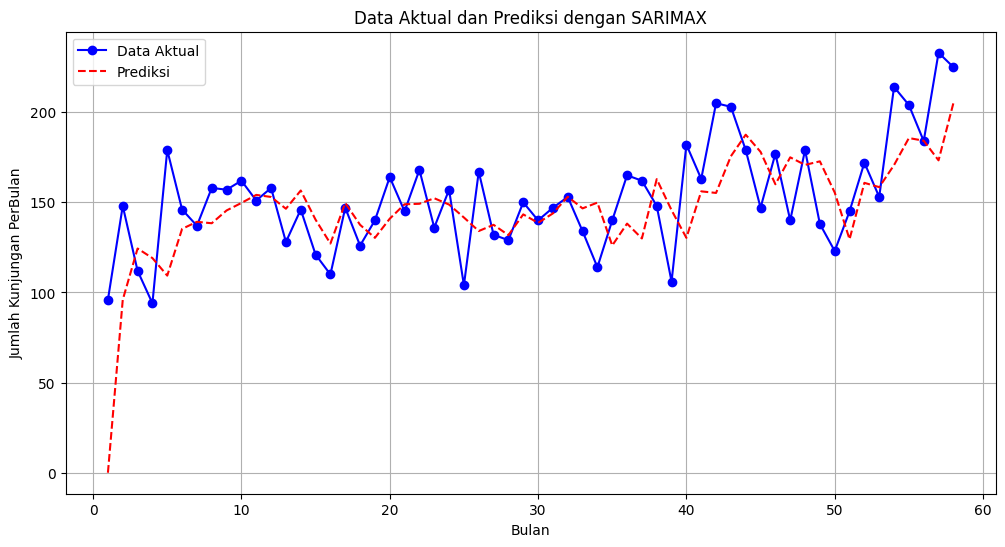

In [ ]:
plt.figure(figsize=(12, 6))

# Plot data aktual
plt.plot(data1.index, data1['jumlah_kunjungan_perbulan'], label='Data Aktual', color='blue', marker='o')

# Plot prediksi
plt.plot(data1.index, diprediksi, label='Prediksi', color='red', linestyle='--')

# Menambahkan label, judul, dan legenda
plt.title('Data Aktual dan Prediksi dengan SARIMAX')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kunjungan PerBulan')
plt.legend()
plt.grid(True)
plt.show()

PREDIKSI 12 BULAN KEDEPAN

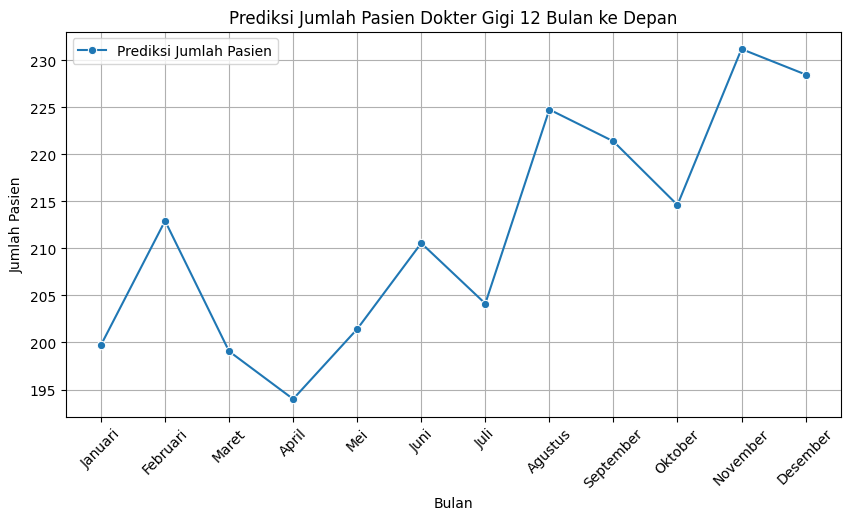

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat model SARIMAX
sarima = SARIMAX(
    data1['jumlah_kunjungan_perbulan'],
    order=(0, 1, 1),  # Parameter ARIMA (p, d, q)
    seasonal_order=(1,0,0,12)  # Parameter musiman (P, D, Q, S)
)

# Melatih model
sarima_fit = sarima.fit()

# Membuat prediksi
# Tentukan start dan end untuk mencakup prediksi masa depan
start = len(data1)  # Indeks awal prediksi (setelah data terakhir)
end = len(data1) + 11  # Indeks akhir prediksi (11 bulan ke depan)

# Prediksi 12 bulan ke depan
diprediksi = sarima_fit.predict(start=start, end=end)

# Daftar nama bulan dari Januari sampai Desember
bulan_nama = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

# Pastikan hasil prediksi memiliki 12 nilai
if len(diprediksi) == 12:
    diprediksi.index = bulan_nama  # Ubah indeks menjadi nama bulan

# Buat DataFrame untuk visualisasi
prediksi_df = pd.DataFrame({
    'Bulan': diprediksi.index,
    'Prediksi': diprediksi.values
})

# Plot Grafik Prediksi
plt.figure(figsize=(10, 5))
sns.lineplot(x=prediksi_df['Bulan'], y=prediksi_df['Prediksi'], marker='o', label="Prediksi Jumlah Pasien")

plt.xlabel("Bulan")
plt.ylabel("Jumlah Pasien")
plt.title("Prediksi Jumlah Pasien Dokter Gigi 12 Bulan ke Depan")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotasi label agar lebih rapi

# Tampilkan Grafik
plt.show()

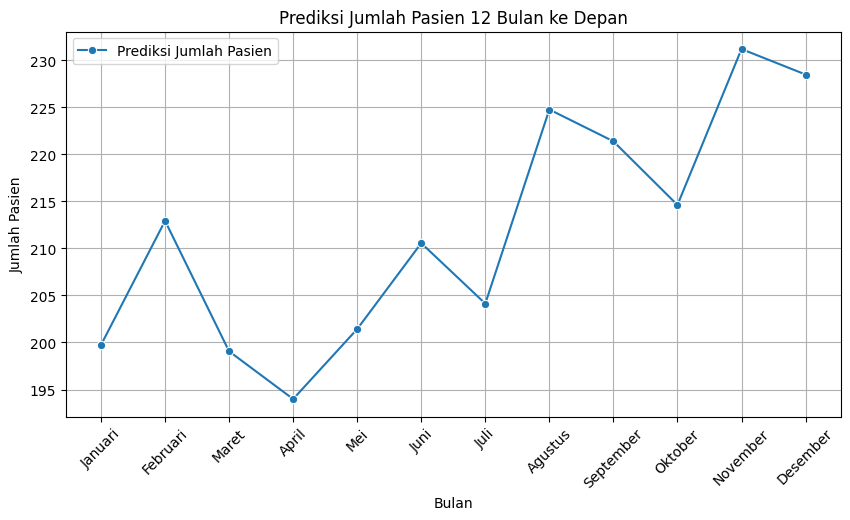

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar nama bulan dari Januari sampai Desember
bulan_nama = [
    "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

# Pastikan hasil prediksi memiliki 12 nilai
if len(diprediksi) == 12:
    diprediksi.index = bulan_nama  # Ubah indeks menjadi nama bulan

# Buat DataFrame untuk visualisasi
prediksi_df = pd.DataFrame({
    'Bulan': diprediksi.index,
    'Prediksi': diprediksi.values
})

# Plot Grafik Prediksi
plt.figure(figsize=(10, 5))
sns.lineplot(x=prediksi_df['Bulan'], y=prediksi_df['Prediksi'], marker='o', label="Prediksi Jumlah Pasien")

plt.xlabel("Bulan")
plt.ylabel("Jumlah Pasien")
plt.title("Prediksi Jumlah Pasien 12 Bulan ke Depan")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotasi label agar lebih rapi

# Tampilkan Grafik
plt.show()


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Data aktual dari set testing
actual = data1['jumlah_kunjungan_perbulan']

# Pastikan diprediksi memiliki panjang yang sama dengan actual
# Ambil 58 nilai terakhir dari diprediksi, atau sesuaikan sesuai kebutuhan
diprediksi = sarima_fit.predict(start=0, end=len(data1) - 1)

# Hitung Mean Squared Error (MSE)
mse = mean_squared_error(actual, diprediksi)

# Hitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Menghitung MAPE
# Handle potential division by zero
mape = np.mean(np.abs((actual - diprediksi) / actual[actual != 0])) * 100

# Cetak hasil evaluasi
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MSE: 795.43
RMSE: 28.20
MAPE: 14.58%


In [ ]:
import pandas as pd

# Data
data5 = {
    "bulan_tahun": ["2024-01", "2024-02", "2024-03", "2024-04", "2024-05", "2024-06",
                    "2024-07", "2024-08", "2024-09", "2024-10", "2024-11", "2024-12"],
    "jumlah_kunjungan_per_bulan": [179, 138, 123, 145, 172, 153, 214, 204, 184, 233, 225, 50]
}

# Membuat DataFrame
df = pd.DataFrame(data5)

# Menyimpan ke file CSV
df.to_csv('data_dokter_gigi2024.csv', index=False)

print("CSV file telah dibuat!")


CSV file telah dibuat!


In [ ]:
import pickle

In [ ]:
file_name = 'model_gigi.sav'
pickle.dump(sarima_fit, open(file_name, 'wb'))

# METODE ABK-KES DOKTER UMUM

In [ ]:
# Input parameter
total_days_per_year = 365           # Total hari dalam setahun
libur_nasional = 27              # Hari libur nasional thn 2025
minggu = 52                         # Hari Minggu dalam setahun (52 minggu × 1 hari/minggu)
cuti_tahunan = 12                   # Cuti tahunan

# Menghitung hari kerja efektif per tahun
hari_kerja_efektif = total_days_per_year - (libur_nasional + minggu + cuti_tahunan)

# Output hasil
print(f"Total hari dalam setahun: {total_days_per_year} hari")
print(f"Hari libur nasional: {libur_nasional} hari")
print(f"Hari Minggu: {minggu} hari")
print(f"Cuti tahunan: {cuti_tahunan} hari")
print(f"Hari kerja efektif per tahun: {hari_kerja_efektif} hari")


Total hari dalam setahun: 365 hari
Hari libur nasional: 27 hari
Hari Minggu: 52 hari
Cuti tahunan: 12 hari
Hari kerja efektif per tahun: 274 hari


In [ ]:
# Input parameter
hari_kerja_per_tahun = 274 # Jumlah hari kerja efektif per tahun
jam_kerja_per_hari = 7      # Jam kerja efektif per hari

# Menghitung WKT Tahunan
wkt_tahunan = hari_kerja_per_tahun * jam_kerja_per_hari
print(f"Waktu Kerja Tahunan (WKT): {wkt_tahunan} jam kerja per tahun")

# Menghitung WKT Bulanan
wkt_bulanan = (wkt_tahunan / 12) * 60
print(f"Waktu Kerja Bulanan (WKT): {wkt_bulanan:.2f} menit kerja per bulan")


Waktu Kerja Tahunan (WKT): 1918 jam kerja per tahun
Waktu Kerja Bulanan (WKT): 9590.00 menit kerja per bulan


In [ ]:
import numpy as np

# Data awal
predicted_patients = 2763 # Hasil prediksi SARIMA (jumlah pasien per bulan)
time_per_patient = 15   # Waktu pelayanan per pasien dalam jam (20 menit)
wkt_per_month = 9590.00     # Waktu Kerja Tersedia (WKT) per SDM per bulan dalam jam

# Hitung Beban Kerja Total (BKT)
bkt = predicted_patients * time_per_patient
print(f"Beban Kerja Total (BKT): {bkt:.2f} menit")

# Hitung kebutuhan Dokter akhir dengan mempertimbangkan STP
stp_time_month = 110
ftp = (stp_time_month / wkt_per_month)*100
stp = 1 / (1 - (ftp / 100))
print(f"Standar Tugas Penunjang: {stp:.2f} ")

# Menghitung Jumlah Dokter Optimal
final_sdm = bkt/(wkt_per_month*stp)
print(f"Jumlah Dokter Optimal: {final_sdm:.2f}")

# Pembulatan ke atas
final_sdm_ceiling = np.ceil(final_sdm)
print(f"Jumlah Dokter Optimal (dibulatkan): {final_sdm_ceiling:.0f}")

# Menghitung Waktu Optiml per Minggu
wkt_optimal = (wkt_per_month*stp)/4
wkt_optimal_dokter = wkt_optimal/60
print(f"Waktu Optimal Dokter per Minggu: {wkt_optimal_dokter:.0f}")

Beban Kerja Total (BKT): 41445.00 menit
Standar Tugas Penunjang: 1.01 
Jumlah Dokter Optimal: 4.27
Jumlah Dokter Optimal (dibulatkan): 5
Waktu Optimal Dokter per Minggu: 40


#METODE ABK-KES DOKTER GIGI

In [ ]:
# Input parameter
total_days_per_year = 365          # Total hari dalam setahun
libur_nasional = 27              # Hari libur nasional thn 2025
minggu = 52                         # Hari Minggu dalam setahun (52 minggu × 1 hari/minggu)
cuti_tahunan = 12                   # Cuti tahunan

# Menghitung hari kerja efektif per tahun
hari_kerja_efektif = total_days_per_year - (libur_nasional + minggu + cuti_tahunan)

# Output hasil
print(f"Total hari dalam setahun: {total_days_per_year} hari")
print(f"Hari libur nasional: {libur_nasional} hari")
print(f"Hari Minggu: {minggu} hari")
print(f"Cuti tahunan: {cuti_tahunan} hari")
print(f"Hari kerja efektif per tahun: {hari_kerja_efektif} hari")


Total hari dalam setahun: 365 hari
Hari libur nasional: 27 hari
Hari Minggu: 52 hari
Cuti tahunan: 12 hari
Hari kerja efektif per tahun: 274 hari


In [ ]:
# Input parameter
hari_kerja_per_tahun = 274
 # Jumlah hari kerja efektif per tahun
jam_kerja_per_hari = 7      # Jam kerja efektif per hari

# Menghitung WKT Tahunan
wkt_tahunan = hari_kerja_per_tahun * jam_kerja_per_hari
print(f"Waktu Kerja Tahunan (WKT): {wkt_tahunan} jam kerja per tahun")

# Menghitung WKT Bulanan
wkt_bulanan = (wkt_tahunan / 12) * 60
print(f"Waktu Kerja Bulanan (WKT): {wkt_bulanan:.2f} menit kerja per bulan")


Waktu Kerja Tahunan (WKT): 1918 jam kerja per tahun
Waktu Kerja Bulanan (WKT): 9590.00 menit kerja per bulan


In [ ]:
import numpy as np

# Data awal
predicted_patients = 224 # Hasil prediksi SARIMA (jumlah pasien per bulan)
time_per_patient = 20   # Waktu pelayanan per pasien dalam jam (20 menit)
wkt_per_month = 9590.00     # Waktu Kerja Tersedia (WKT) per SDM per bulan dalam jam

# Hitung Beban Kerja Total (BKT)
bkt = predicted_patients * time_per_patient
print(f"Beban Kerja Total (BKT): {bkt:.2f} menit")

# Hitung kebutuhan Dokter akhir dengan mempertimbangkan STP
stp_time_month = 120
ftp = (stp_time_month / wkt_per_month)*100
stp = 1 / (1 - (ftp / 100))
print(f"Standar Beban Kerja (BKT): {stp:.2f} ")

# Menghitung Jumlah Dokter Optimal
final_sdm = bkt/(wkt_per_month*stp)
print(f"Jumlah Dokter Optimal: {final_sdm:.2f}")

# Pembulatan ke atas
final_sdm_ceiling = np.ceil(final_sdm)
print(f"Jumlah Dokter Optimal (dibulatkan): {final_sdm_ceiling:.0f}")

# Menghitung Waktu Optiml per Minggu
wkt_optimal = (wkt_per_month*stp)/4
wkt_optimal_dokter = wkt_optimal/60
print(f"Waktu Optimal Dokter per Minggu: {wkt_optimal_dokter:.0f}")

Beban Kerja Total (BKT): 4480.00 menit
Standar Beban Kerja (BKT): 1.01 
Jumlah Dokter Optimal: 0.46
Jumlah Dokter Optimal (dibulatkan): 1
Waktu Optimal Dokter per Minggu: 40


# STREAMLIT

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

Writing app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.106.50.229


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.50.229:8501

⠧⠇your url is: https://tough-breads-tickle.loca.lt
